<a href="https://colab.research.google.com/github/Dasarichandrashekar08/Data-science-ML-GenAI/blob/master/ANN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN

[statinfer.com](https://statinfer.com/)

In [1]:
import pandas as pd
Emp_Purchase_raw = pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Emp_Purchase/Emp_Purchase.csv")
Emp_Purchase_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         119 non-null    float64
 1   Experience  119 non-null    float64
 2   Purchase    119 non-null    int64  
 3   Sample_Set  119 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.8 KB


In [2]:
####Filter the data and take a subset from above dataset . Filter condition is Sample_Set<3

Emp_Purchase1=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set<3]
Emp_Purchase1.shape

(74, 4)

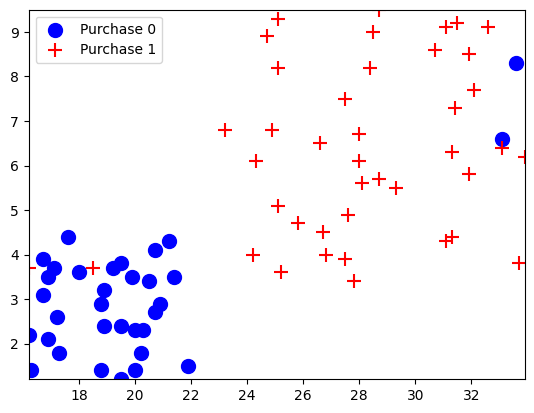

In [3]:
####The clasification graph
#Draw a scatter plot that shows Age on X axis and Experience on Y-axis. Try to distinguish the two classes with colors or shapes.
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==0],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==1],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase1.Age), max(Emp_Purchase1.Age))
plt.ylim(min(Emp_Purchase1.Experience), max(Emp_Purchase1.Experience))
plt.legend(loc='upper left');

plt.show()

# Logistic Regerssion - Decisio Boundary

In [4]:
import statsmodels.formula.api as sm
model1 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase1)
fitted1 = model1.fit()
print(fitted1.summary2())

#######Accuracy and error of the model1
#Create the confusion matrix
predicted_values=fitted1.predict(Emp_Purchase1[["Age"]+["Experience"]])
predicted_values[1:10]
threshold=0.5

import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase1[['Purchase']],predicted_class)
print("ConfusionMatrix \n",ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print('Accuracy : ',accuracy)
error=1-accuracy
print('Error: ',error)

Optimization terminated successfully.
         Current function value: 0.315987
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Purchase         Pseudo R-squared: 0.540     
Date:               2024-07-16 06:46 AIC:              52.7661   
No. Observations:   74               BIC:              59.6783   
Df Model:           2                Log-Likelihood:   -23.383   
Df Residuals:       71               LL-Null:          -50.860   
Converged:          1.0000           LLR p-value:      1.1670e-12
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
Intercept    -8.9361    2.0613  -4.3351  0.0000  -12.9763  -4.8960
Age           0.2763    0.1054   2.6201  0.0088    0.0696   0.

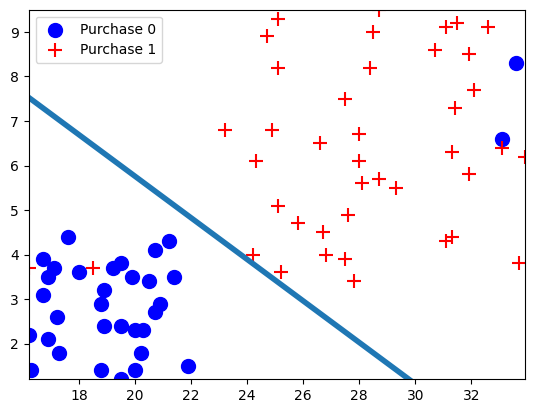

In [5]:
#coefficients
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])

#Finally draw the decision boundary for this logistic regression model

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==0],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==1],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase1.Age), max(Emp_Purchase1.Age))
plt.ylim(min(Emp_Purchase1.Experience), max(Emp_Purchase1.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1],linewidth=4)
plt.show()

# Non-Linear Decision Boundaries

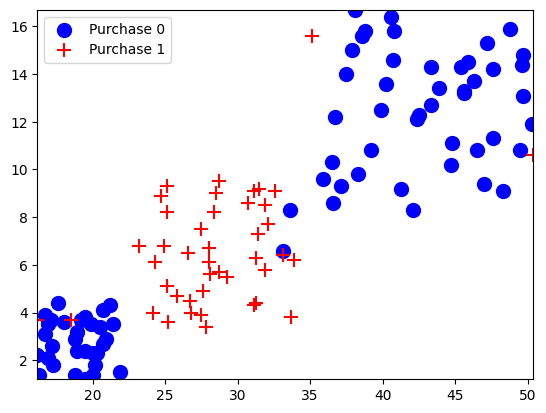

In [6]:
#plotting the overall data
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))
plt.legend(loc='upper left');
plt.show()

Optimization terminated successfully.
         Current function value: 0.632202
         Iterations 5


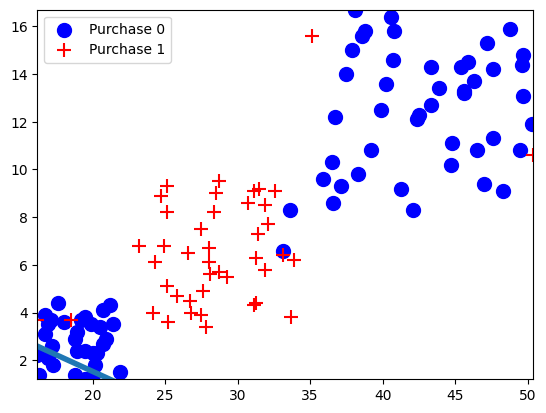

In [7]:
###Logistic Regerssion model1
import statsmodels.formula.api as sm
model = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase_raw)
fitted = model.fit()
fitted.summary2()

# getting slope and intercept of the line
slope=fitted.params[1]/(-fitted.params[2])
intercept=fitted.params[0]/(-fitted.params[2])

#Finally draw the decision boundary for this logistic regression model
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')
plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))
plt.legend(loc='upper left');

x_min, x_max = ax.get_xlim()
ax.plot([0, x_max], [intercept, x_max*slope+intercept],linewidth=4)
plt.show()


# Two Intermediate Models

In [8]:
#Second model
Emp_Purchase2=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set>1]
Emp_Purchase2.shape
Emp_Purchase2.columns.values
Emp_Purchase2.head(10)


,Age,Experience,Purchase,Sample_Set
33,33.9,6.2,1,2
34,29.3,5.5,1,2
35,27.8,3.4,1,2
36,30.7,8.6,1,2
37,28.4,8.2,1,2
38,31.3,6.3,1,2
39,33.7,3.8,1,2
40,33.1,6.4,1,2
41,24.3,6.1,1,2
42,27.5,7.5,1,2


In [9]:
import statsmodels.formula.api as sm
model2 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase2)
fitted2 = model2.fit()
print(fitted2.summary2())

# getting slope and intercept of the line
# getting slope and intercept of the line
slope2=fitted2.params[1]/(-fitted2.params[2])
intercept2=fitted2.params[0]/(-fitted2.params[2])


Optimization terminated successfully.
         Current function value: 0.198139
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: Purchase         Pseudo R-squared: 0.714     
Date:               2024-07-16 07:04 AIC:              40.0799   
No. Observations:   86               BIC:              47.4429   
Df Model:           2                Log-Likelihood:   -17.040   
Df Residuals:       83               LL-Null:          -59.518   
Converged:          1.0000           LLR p-value:      3.5660e-19
No. Iterations:     8.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     16.3184    3.9662   4.1144  0.0000   8.5448  24.0919
Age           -0.3994    0.1354  -2.9494  0.0032  -0.6648  -0.

## The Intermediate output and combined model

In [10]:
#The two new coloumns
Emp_Purchase_raw['inter1']=fitted1.predict(Emp_Purchase_raw[["Age"]+["Experience"]])
Emp_Purchase_raw['inter2']=fitted2.predict(Emp_Purchase_raw[["Age"]+["Experience"]])


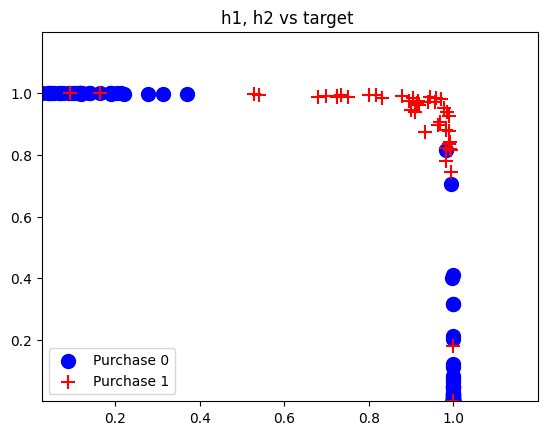

In [11]:
#plotting the new columns vs Target
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase_raw.inter1), max(Emp_Purchase_raw.inter1)+0.2)
plt.ylim(min(Emp_Purchase_raw.inter2), max(Emp_Purchase_raw.inter2)+0.2)

plt.legend(loc='lower left')
plt.title('h1, h2 vs target ')
plt.show()

## Final Logistic Regerssion model with Intermediate outputs as input

Optimization terminated successfully.
         Current function value: 0.208985
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27


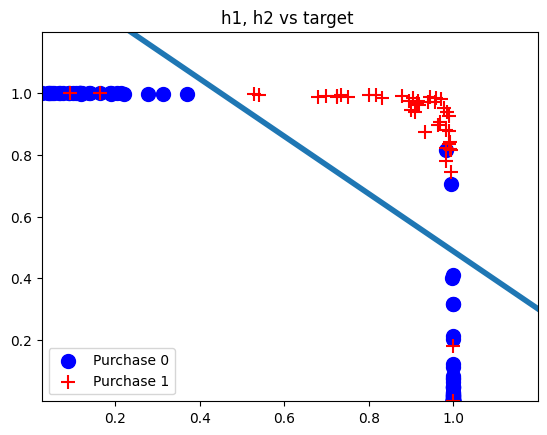

In [12]:

import statsmodels.formula.api as sm

model_combined = sm.logit(formula='Purchase ~ inter1+inter2', data=Emp_Purchase_raw)
fitted_combined = model_combined.fit(method="bfgs")
fitted_combined.summary()

# getting slope and intercept of the line
slope_combined=fitted_combined.params[1]/(-fitted_combined.params[2])
intercept_combined=fitted_combined.params[0]/(-fitted_combined.params[2])

#Finally draw the decision boundary for this logistic regression model
import matplotlib.pyplot as plt

fig = plt.figure()
ax2 = fig.add_subplot(111)

ax2.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax2.scatter(Emp_Purchase_raw.inter1[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.inter2[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="+", label='Purchase 1')

plt.xlim(min(Emp_Purchase_raw.inter1), max(Emp_Purchase_raw.inter1)+0.2)
plt.ylim(min(Emp_Purchase_raw.inter2), max(Emp_Purchase_raw.inter2)+0.2)

plt.legend(loc='lower left')
plt.title('h1, h2 vs target ')

x_min, x_max = ax2.get_xlim()
y_min,y_max=ax2.get_ylim()
ax2.plot([x_min, x_max], [x_min*slope_combined+intercept_combined, x_max*slope_combined+intercept_combined],linewidth=4)
plt.show()

In [13]:
#######Accuracy and error of the model1
#Create the confusion matrix
#Predciting Values
predicted_values=fitted_combined.predict(Emp_Purchase_raw[["inter1"]+["inter2"]])
predicted_values[1:10]

#Lets convert them to classes using a threshold
threshold=0.5
threshold

import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

#ConfusionMatrix
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase_raw[['Purchase']],predicted_class)
print(ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print(accuracy)

[[74  2]
 [ 4 39]]
0.9495798319327731


## The two decison boundries

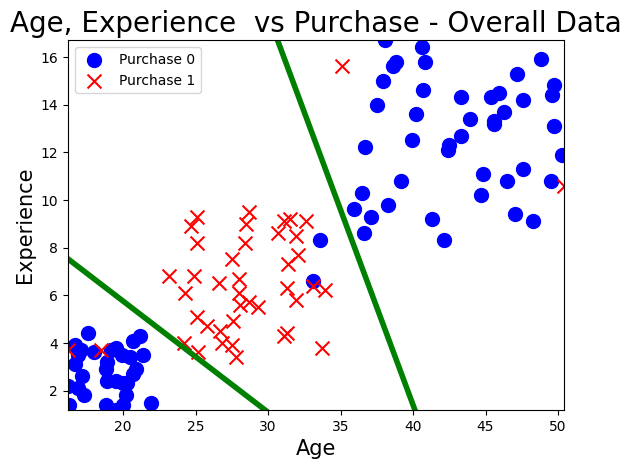

In [14]:
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])

slope2=fitted2.params[1]/(-fitted2.params[2])
intercept2=fitted2.params[0]/(-fitted2.params[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Age, Experience  vs Purchase - Overall Data', fontsize=20)


ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1],linewidth=4,c='g')
ax1.plot([0, x_max], [intercept2, x_max*slope2+intercept2],linewidth=4, c='g')

plt.legend(loc='upper left')
plt.show()

# Building the neural network in Py

# Digit Recognition Example

In [ ]:
#Image importing
import matplotlib.pyplot as plt
import urllib.request

#read cat image
urllib.request.urlretrieve("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/cat/cat.jpeg", "cat.jpeg")
x=plt.imread('cat.jpeg')
plt.imshow(x)
print("Shape of the Image ", x.shape)


In [ ]:
print(x)

In [ ]:
!pip install neurolab
import neurolab as nl
import numpy as np

In [ ]:
#Importing test and training data
import numpy as np
digits_train = np.loadtxt("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Digit%20Recognizer/USPS/zip.train.txt")
digits_test = np.loadtxt("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Digit%20Recognizer/USPS/zip.test.txt")

#digits_train is numpy array. we convert it into dataframe for better handling
train_data=pd.DataFrame(digits_train)
test_data=pd.DataFrame(digits_test)
print("train_data.shape", train_data.shape)
print(train_data.head())

In [ ]:
#To get labels of the images
train_data[0].value_counts()

In [ ]:
#Lets see some random images.
from random import randrange
i=randrange(7000)

print("Row num", i)
data_row=digits_train[i][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.imshow(pixels,cmap='Greys')
plt.show()

print("Row num", i+100)
data_row=digits_train[i+100][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.imshow(pixels,cmap='Greys')
plt.show()

print("Row num", i+200)
data_row=digits_train[i+200][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.imshow(pixels,cmap='Greys')

## Data preparation

In [ ]:
X_train=train_data.iloc[:,1:]
X_test=test_data.iloc[:,1:]
y_train=train_data.iloc[:,0]
y_test=test_data.iloc[:,0]
#Shape of the data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

In [ ]:
#Creating multiple binary columns for multiple outputs
#####We need these variables while building the model
digit_labels=pd.DataFrame()

#Convert target into onehot encoding
digit_labels = pd.get_dummies(y_train)

#see our newly created labels data
digit_labels.head(10)

In [ ]:
#getting minimum and maximum of each column of x_train into a list
min_max_all_cols=[[X_train[i][0:].min(), X_train[i][0:].max()] for i in range(1,X_train.shape[1]+1)]
print(len(min_max_all_cols))
print(min_max_all_cols)


## Model Building

In [ ]:
##Configure the network
net = nl.net.newff(minmax=min_max_all_cols,size=[20,10],transf=[nl.trans.LogSig()]*2)

#Training method is Resilient Backpropagation method
net.trainf = nl.train.train_rprop

##Train the network
import time
start_time = time.time()
net.train(X_train, digit_labels, show=0, epochs=300)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
'''
#minmax
This parameter takes a list of lists as input.
We need to supply the minimum and maximum value of all the input variables.
It helps the algorithm in weights initialization

#Size
Takes a list as input.
Mention nodes in each layer except the input layer
[Nodes in hidden layer1, Nodes in hidden layer2,…, Nodes in hidden layer k, Nodes in output layer]
[2,1] – One hidden layer with 2 nodes and an output layer with one node
[20,10] – One hidden layer with 20 nodes and an output layer with ten nodes

#Transf= nl.trans.LogSig()
‘Transf’ is the activation function parameter. LogSig() is the sigmoid function’s standard syntax. For regression output we can use “PureLin”
[nl.trans.LogSig()]*2	*2 denotes the two activations from input to hidden; hidden to output in this case.
If we have two hidden layers, then we need to mention*3

net.trainf = nl.train.train_rprop
#Train algorithms based gradients algorithms - Resilient Backpropagation

'''

## Model Results

In [ ]:
# Prediction on test data
predicted_values = net.sim(X_test)
predicted=pd.DataFrame(predicted_values)
#print(round(predicted.head(10),3))

#Converting predicted probabilities into numbers
predicted_number=predicted.idxmax(axis=1)
#print(predicted_number.head(15))

##Accuracy calculation on test data
#confusion matrix
ConfusionMatrix = cm(y_test,predicted_number)
print("ConfusionMatrix on test data \n", ConfusionMatrix)

#accuracy
accuracy=np.trace(ConfusionMatrix)/sum(sum(ConfusionMatrix))
print("Test Accuracy", accuracy)

In [ ]:
###Preictions on Random data

#i is a random number between 0 and 7291
i=randrange(7291)

random_sampel_data=digits_train[[i]]
random_sampel_data1=pd.DataFrame(random_sampel_data)
X_sample=random_sampel_data1.drop(random_sampel_data1.columns[[0]], axis=1)

predicted_values = net.sim(X_sample)
predicted=pd.DataFrame(predicted_values)
predicted_number=predicted.idxmax(axis=1)
predicted_number

data_row=random_sampel_data[0][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.rcParams["figure.figsize"] = (7,5)
plt.title(["Row No ", i, "Predicted Digit ", predicted_number[0]], fontsize=20)
plt.imshow(pixels, cmap='Greys')